In [1]:
import pandas as pd
xl=('C:/tensor/Mask_RCNN/samples/Root/data.xlsx')
xl_file = pd.ExcelFile(xl)



In [2]:
type(xl_file)

pandas.io.excel.ExcelFile

In [3]:
sheet1=pd.read_excel(xl,sheet_name=0)

In [4]:
sheet1.head()

,name,Flybase.CG,Entrez.Id,Chromosome,start,stop,strand,Intron.length,pi21,pi22,...,trachea.present,trachea.ratio,Drosophila.S2.cells.vs.whole.flies...T.Test_Change.Direction,S2.Mean,S2.sem,S2.present,S2.ratio,FlyMean,FlySEM,FlyPresent
0,Gpdh,CG9042,33824,2L,5943681,5947625,1,2498,0.006385,0.006425,...,4,0.100823,Down,408.825,7.471097,4,0.280401,1458.0,127.8,4
1,CG15120,CG15120,37248,2R,15385258,15387878,1,1551,0.008505,0.008557,...,0,0.044776,Down,4.775,1.565447,0,0.178172,26.8,6.5,2
2,CG32075,CG32075,326192,3L,-11055825,-11058037,-1,261,0.003794,0.003818,...,4,0.978522,Up,142.375,6.283891,4,1.223153,116.4,2.3,4
3,pinta,CG13848,42635,3R,-18249026,-18250447,-1,273,0.003704,0.003727,...,4,1.257414,Up,107.350,7.383822,4,1.312748,81.8,3.2,4
4,Gr59d,CG30330,117343,2R,-18991463,-18992692,-1,56,0.007111,0.007155,...,0,0.479532,None,3.600,0.859263,1,0.842105,4.3,1.4,0


In [76]:
import scipy
pi21 = sheet1['pi22'].values[:] 
pi22 = sheet1['pi22'].values[:] 
pi23 = sheet1['pi23'].values[:]
pi24 = sheet1['pi24'].values[:] 
t_mean=sheet1['pi24'].values[:] 
tissues=sheet1['Tissue Specificity'].values[:]
ratio=sheet1['trachea.ratio'].values[:]
pi21=pi21.tolist()
pi22=pi22.tolist()
pi23=pi23.tolist()
pi24=pi24.tolist()
tissues=tissues.tolist()
ratio=ratio.tolist()
import matplotlib.pyplot as plt

PI21=[]
PI22=[]
PI23=[]
PI24=[]
Tissue_mean=[]
TI=[]
ratio1=[]
for i in range(len(pi21)):
    if (isinstance(pi21[i], float))and (isinstance(pi22[i], float)) and (isinstance(pi23[i], float)) and (isinstance(pi24[i], float)) and (isinstance(tissues[i], float) and (isinstance(ratio[i], float))):
        PI21.append(pi21[i])
        PI22.append(pi22[i])
        PI23.append(pi23[i])
        PI24.append(pi24[i])
        TI.append(tissues[i])
        ratio1.append(ratio[i])
 
  

<IPython.core.display.Javascript object>


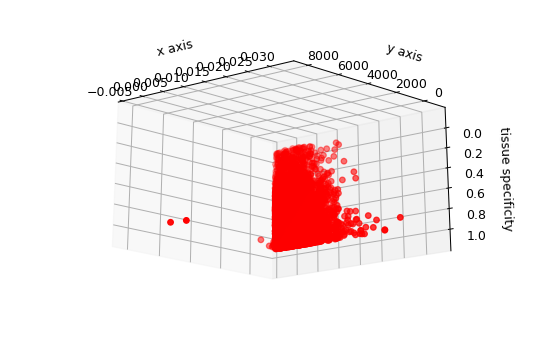

In [124]:
#listan = ['BrainMean',' HeadMean','cropMean','MidgutMean','HindgutMean','tubuleMean',' OvaryMean',' TestisMean',' AccMean',' l_tubMean',' l_fatMean','tagMean',' carMean',' Sgmean',' l_sg.mean',' l_mid.mean',' l_hind.mean',' SptV.mean',' SptM.mean',' LcnsMean',' AFBmean',' LcarMean',' eye.mean',' heart.mean',' trachea.mean',' S2.Mean',' FlyMean']
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X=PI21
Y=ratio1
Z=TI
ax.scatter(X, Y, Z, c='r', marker='o')
ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_zlabel("tissue specificity")
plt.show()

In [136]:

Z=sheet1['Tissue Specificity'].values[:]
#assert len(z) == (len(x) * len(y))
#X, Y=np.meshgrid(X,Y)
z=np.array(Z)
z=z.reshape((len(X),len(Y))
plt.contour(X, Y, z, 20, cmap='RdGy')
plt.show()

SyntaxError: invalid syntax (<ipython-input-136-8ba14f386c08>, line 7)

In [18]:
#Multiple linear regression 
import numpy as np
import pandas as pd
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter
enroll=[[X,Y,Z]]


In [133]:
import statsmodels.api as sm
#Tissue Specificity calculated on log-transformed data
#y=sheet1['Tissue Specificity']
y=sheet1['Tissue Specificity']

x=sheet1[['pi24','trachea.ratio']]
X1=sm.add_constant(x)
print(type(X1))
print(type(y))
model = sm.OLS(y, X1,missing='drop').fit()
predictions = model.predict(X1)
model.summary()



<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Tissue Specificity   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     81.76
Date:                Mon, 11 Feb 2019   Prob (F-statistic):           5.39e-36
Time:                        19:38:51   Log-Likelihood:                 2786.5
No. Observations:               11910   AIC:                            -5567.
Df Residuals:                   11907   BIC:                            -5545.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7086      0.003    242.479      0.000       0.703       0.714
pi24              7.0521      0.577     12.218      0.000       5.921       8.184
trachea.ratio  6.611e-05   1.77e-05      3.725      0.000    3.13e-05       0.000
==============================================================================
Omnibus:                     1511.574   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2212.748
Skew:                          -0.949   Prob(JB):                         0.00
Kurtosis:                       3.923   Cond. No.                     3.26e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import scipy
from scipy.stats import pearsonr


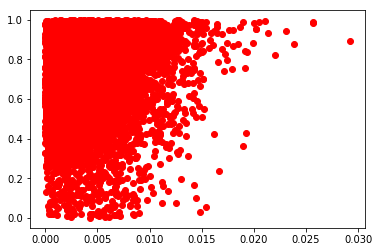

In [136]:
#Uppgift 1 a)
import numpy as np
#X= nucleotide diversity
#Y=
p1=plt.plot(PI22,TI,  'ro')
plt.show(p1)

